# 收集数据

In [1]:
import json
import pandas as pd
import requests
import numpy as np

In [2]:
#读取WeRateDogs的推特档案
WeRateDogs_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#使用requests库从网上下载推特图像的预测数据
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [4]:
#读取推特图像的预测数据
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
#创建空的list，逐行读取文件，再转换成dataframe
extra_data_list = []
with open('tweet_json.txt', encoding = 'utf-8') as json_file:
    for line in json_file.readlines():
        extra_data_list.append(json.loads(line))
extra_data = pd.DataFrame(extra_data_list)

# 评估数据

In [6]:
WeRateDogs_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
WeRateDogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
WeRateDogs_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
sum(WeRateDogs_archive.duplicated())

0

In [10]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
sum(image_predictions.duplicated())

0

In [13]:
extra_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548,False,Here we have a majestic great white breaching ...,None,...,False,NaN,NaN,NaN,3240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,False,NaN,NaN,NaN,2142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596,False,When you watch your owner call another dog a g...,None,...,False,NaN,NaN,NaN,19548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28187,False,This is Zoey. She doesn't want to be one of th...,None,...,False,NaN,NaN,NaN,4403,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,None,...,False,NaN,NaN,NaN,7684,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835'

In [14]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2352 non-null object
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null object
id                               2352 non-null int64
id_str                           2352 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

#### 质量  

`WeRateDogs_archive`  
- in_reply_to_status_id和in_reply_to_user_id数据缺失
- 转发的数据有重复数据
- expanded_urls缺失部分数据
- timestamp的类型应该是时间，不是字符串
- 部分rating_numerator为小数，原数据提取错误
- 666287406224695296的评分不是1/2，应该是9/10
- 722974582966214656的评分不是4/20，应该是13/10
- 682962037429899265的评分不是7/11，应该是10/10
- 740373189193256964的评分不是9/11，应该是14/10
- rating_denominator有异常数据
- 名字中有错误数据如'a'
- 854010172552949760的地位应该是floofer
- 817777686764523521的地位应该是pupper
- 801115127852503040的地位应该是pupper
- 785639753186217984的地位应该是doggo
- 751583847268179968的地位应该是none
- 855851453814013952的地位应该是puppo

`image_predictions`  
- 总数比`WeRateDogs_archive`表少，缺失数据

`extra_data`
- 贡献者、坐标、回复、转发等列缺失数据
- creat_at列内容与上表的timestamp重复
- 语言列的类型应为category
- id_str内容与id重复，仅数据类型不一致
- id的名称应该为tweet_id,与上面两表一致


#### 清洁度

- `WeRateDogs_archive`最后4列狗的地位属于同一变量，可合并为一列
- 三张表应按照tweet_id合成一张表

# 清理数据

In [15]:
#创建副本
WeRateDogs_archive_clean = WeRateDogs_archive.copy()
image_predictions_clean = image_predictions.copy()
extra_data_clean = extra_data.copy()

### 质量
#### `WeRateDogs_archive`  ：in_reply_to_status_id和in_reply_to_user_id数据缺失
##### 定义 
删除in_reply_to_status_id和in_reply_to_user_id

##### 代码

In [16]:
WeRateDogs_archive_clean = WeRateDogs_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'], axis = 1)

#####  测试

In [17]:
list(WeRateDogs_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### `WeRateDogs_archive`  ： 转发的数据为重复数据
##### 定义 
删除'retweeted_status_id'和tweet_id重复的行，后删除'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'列

##### 代码

In [18]:
# 用tweet_id的值代替retweeted_status_id的空值
WeRateDogs_archive_clean['retweeted_status_id'].fillna(WeRateDogs_archive_clean['tweet_id'] ,inplace = True)

In [19]:
WeRateDogs_archive_clean.drop_duplicates('retweeted_status_id' , 'last' , inplace = True)

##### 测试

In [20]:
# 应为0 
sum(WeRateDogs_archive_clean['retweeted_status_id'].duplicated())

0

In [21]:
WeRateDogs_archive_clean = WeRateDogs_archive_clean.drop(['retweeted_status_id',
                                                          'retweeted_status_user_id','retweeted_status_timestamp'],axis = 1)

#### `WeRateDogs_archive`  ：expanded_urls缺失部分数据
##### 定义 
将缺失的行删除

##### 代码

In [22]:
WeRateDogs_archive_clean = WeRateDogs_archive_clean.dropna()

##### 测试

In [23]:
WeRateDogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2141 non-null int64
timestamp             2141 non-null object
source                2141 non-null object
text                  2141 non-null object
expanded_urls         2141 non-null object
rating_numerator      2141 non-null int64
rating_denominator    2141 non-null int64
name                  2141 non-null object
doggo                 2141 non-null object
floofer               2141 non-null object
pupper                2141 non-null object
puppo                 2141 non-null object
dtypes: int64(3), object(9)
memory usage: 217.4+ KB


#### `WeRateDogs_archive`  ：时间戳的类型应该是时间，不是字符串
##### 定义 
用astype将时间戳改为时间类型

##### 代码

In [24]:
WeRateDogs_archive_clean.timestamp = pd.to_datetime(WeRateDogs_archive_clean.timestamp)

##### 测试

In [25]:
WeRateDogs_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2141 non-null int64
timestamp             2141 non-null datetime64[ns]
source                2141 non-null object
text                  2141 non-null object
expanded_urls         2141 non-null object
rating_numerator      2141 non-null int64
rating_denominator    2141 non-null int64
name                  2141 non-null object
doggo                 2141 non-null object
floofer               2141 non-null object
pupper                2141 non-null object
puppo                 2141 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 217.4+ KB


#### `WeRateDogs_archive`  ：部分rating_numerator为小数，原数据提取错误
##### 定义 
用正则表达式提取出小数并填充到相应行的rating_numerator

##### 代码

In [26]:
# 用正则表达式提取text中带小数的分数并填充到新列float_numerator
WeRateDogs_archive_clean['float_numerator'] = WeRateDogs_archive_clean['text'].str.extract('(\d+\.\d+/\d+)',expand = False).str.split('/',expand = True)[0]

In [27]:
# 用rating_numerator中的值填充到float_numerator中对应行的空值
WeRateDogs_archive_clean.loc[WeRateDogs_archive_clean['float_numerator'].isnull(),'float_numerator'] = WeRateDogs_archive_clean[WeRateDogs_archive_clean['float_numerator'].isnull()]['rating_numerator']

In [28]:
# 删除rating_numerator列，并将float_numerator列改名为rating_numerator
WeRateDogs_archive_clean = WeRateDogs_archive_clean.drop(['rating_numerator'] , axis = 1)
WeRateDogs_archive_clean.rename( columns= {'float_numerator': 'rating_numerator'} , inplace = True)

In [29]:
# 修改rating_numerator类型为float
WeRateDogs_archive_clean['rating_numerator'] = WeRateDogs_archive_clean['rating_numerator'].astype(float)

##### 测试

In [30]:
# 应为float
WeRateDogs_archive_clean['rating_numerator'].dtypes

dtype('float64')

#### `WeRateDogs_archive`  ： 评分分母有异常数据
##### 定义 
将异常的分母改为10

##### 代码

In [31]:
WeRateDogs_archive_clean.replace({'rating_denominator': 0 }, 10 , inplace = True)

##### 测试

In [32]:
# 应为空
WeRateDogs_archive_clean[WeRateDogs_archive_clean.rating_denominator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator


#### `WeRateDogs_archive`  ：
666287406224695296的评分不是1/2，应该是9/10      
682962037429899265的评分不是7/11，应该是10/10  
740373189193256964的评分不是9/11，应该是14/10
##### 定义 
用replace更改评分

##### 代码

In [33]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id']==666287406224695296] = WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id']==666287406224695296].replace({1:9,2:10})

In [34]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id']==682962037429899265] = WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id']==682962037429899265].replace({7:10,11:10})

In [35]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id']==740373189193256964] = WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 740373189193256964].replace({9:14,11:10})

##### 测试

In [36]:
WeRateDogs_archive_clean.query('tweet_id==[666287406224695296,682962037429899265,740373189193256964]')

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,10,None,None,None,None,None,14.0
1662,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,Darrel,None,None,None,None,10.0
2335,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,10,an,None,None,None,None,9.0


#### `WeRateDogs_archive`  ： 名字中有错误数据如'a'

##### 定义 
挑选出错误的名字并替换成None

##### 代码

In [37]:
sorted(WeRateDogs_archive_clean.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [38]:
#将错误的名字列表命名为wrong_name
wrong_name = ['a','actually','all','an','by','getting','his','incredibly',
              'infuriating','just','life','light','mad','my','not',
              'officially','old','one','quite','space','such','the','this','unacceptable','very']

In [39]:
for name in wrong_name:
    WeRateDogs_archive_clean.replace({'name' : name} , 'None', inplace = True)

##### 测试

In [40]:
sorted(WeRateDogs_archive_clean.name.unique())

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


#### `WeRateDogs_archive`  ： 
854010172552949760的地位应该是floofer  
817777686764523521的地位应该是pupper  
801115127852503040的地位应该是pupper  
785639753186217984的地位应该是doggo  
751583847268179968的地位应该是none  
855851453814013952的地位应该是puppo

##### 定义 
用replace修改狗的地位

##### 代码

In [41]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 854010172552949760] = WeRateDogs_archive_clean[
    WeRateDogs_archive_clean['tweet_id'] == 854010172552949760].replace({'doggo':'None'})

In [42]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 817777686764523521] = WeRateDogs_archive_clean[
    WeRateDogs_archive_clean['tweet_id'] == 817777686764523521].replace({'doggo':'None'})

In [43]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 801115127852503040] = WeRateDogs_archive_clean[
    WeRateDogs_archive_clean['tweet_id'] == 801115127852503040].replace({'doggo':'None'})

In [44]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 785639753186217984] = WeRateDogs_archive_clean[
    WeRateDogs_archive_clean['tweet_id'] == 785639753186217984].replace({'pupper':'None'})

In [45]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 751583847268179968] = WeRateDogs_archive_clean[
    WeRateDogs_archive_clean['tweet_id'] == 751583847268179968].replace({'doggo':'None'})
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 751583847268179968] = WeRateDogs_archive_clean[
    WeRateDogs_archive_clean['tweet_id'] == 751583847268179968].replace({'pupper':'None'})

In [46]:
WeRateDogs_archive_clean[WeRateDogs_archive_clean['tweet_id'] == 855851453814013952] = WeRateDogs_archive_clean[
    WeRateDogs_archive_clean['tweet_id'] == 855851453814013952].replace({'doggo':'None'})

##### 测试

In [47]:
WeRateDogs_archive_clean.query('tweet_id == [854010172552949760,817777686764523521,801115127852503040,785639753186217984,855851453814013952,751583847268179968]')

,tweet_id,timestamp,source,text,expanded_urls,rating_denominator,name,doggo,floofer,pupper,puppo,rating_numerator
191,855851453814013952,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,10,None,None,None,None,puppo,13.0
200,854010172552949760,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,10,None,None,floofer,None,None,11.0
460,817777686764523521,2017-01-07 16:59:28,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,10,Dido,None,None,pupper,None,13.0
575,801115127852503040,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,10,Bones,None,None,pupper,None,12.0
705,785639753186217984,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,Pinot,doggo,None,None,None,10.0
956,751583847268179968,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,10,None,None,None,None,None,5.0


#### `extra_data`  ： 贡献者、坐标、回复、转发等列缺失数据

##### 定义 
保留id,favorite_count,lang,retweet_count列，其余列删除


In [48]:
extra_data_clean = extra_data_clean[['id','favorite_count','lang','retweet_count']]

##### 测试

In [49]:
list(extra_data_clean)

['id', 'favorite_count', 'lang', 'retweet_count']

#### `extra_data`  ： 语言列的类型应为category


##### 定义 
用astype转变类型

##### 代码

In [50]:
extra_data_clean['lang'] = extra_data_clean['lang'].astype('category')

##### 测试

In [51]:
extra_data_clean.lang.dtype

CategoricalDtype(categories=['en', 'es', 'et', 'eu', 'in', 'nl', 'ro', 'tl', 'und'], ordered=False)

#### `extra_data`  ： id的名称应该为tweet_id,与上面两表一致  

##### 定义 
使用rename更改列名

##### 代码

In [52]:
extra_data_clean.rename(columns={'id':'tweet_id'}, inplace = True)

##### 测试

In [53]:
list(extra_data_clean)

['tweet_id', 'favorite_count', 'lang', 'retweet_count']

### 清洁度
#### `WeRateDogs_archive`最后4列狗的地位属于同一变量，可合并为一列
##### 定义 
先将数据集按狗的地位分为‘全为None’的和‘不为None’的，然后将‘不为None’的表用pd.melt融合，加入新列‘status’，类型为category，后将两表合并

##### 代码

In [54]:
# 将数据集按狗的地位分为‘None'和’不为None'
df1 = WeRateDogs_archive_clean[(WeRateDogs_archive_clean['doggo'] == 'None')
                               &(WeRateDogs_archive_clean['floofer'] == 'None')
                               &(WeRateDogs_archive_clean['pupper'] == 'None')
                               &(WeRateDogs_archive_clean['puppo'] == 'None')]
df2 = WeRateDogs_archive_clean[~((WeRateDogs_archive_clean['doggo'] == 'None')
                               &(WeRateDogs_archive_clean['floofer'] == 'None')
                               &(WeRateDogs_archive_clean['pupper'] == 'None')
                               &(WeRateDogs_archive_clean['puppo'] == 'None'))]

In [55]:
# 使用pd.melt按狗的地位融合
df2 = pd.melt(df2,id_vars=['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name'] ,var_name = 'status')

In [56]:
# 筛选出value不为None的数据，并删除‘value’列
df2 = df2[df2.value != 'None']
df2 = df2.drop('value',axis=1)

In [57]:
# 将df2中重复的tweet_id的status标记为multiple，并删除重复行
df2[df2['tweet_id'].duplicated()] = df2[df2['tweet_id'].duplicated()].replace('pupper','multiple')
df2.drop_duplicates('tweet_id','last',inplace = True)

In [58]:
# 在df1中加入新列‘status',值为None,并删除’doggo’等4列
import warnings
warnings.filterwarnings("ignore")
df1['status'] = np.nan
df1 = df1.drop(['doggo','floofer','pupper','puppo'],axis = 1)

In [59]:
# 合并df1和df2
WeRateDogs_archive_clean = pd.concat([df1,df2])

In [60]:
WeRateDogs_archive_clean['status'] = WeRateDogs_archive_clean['status'].astype('category')

##### 测试

In [61]:
WeRateDogs_archive_clean

,expanded_urls,name,rating_denominator,rating_numerator,source,status,text,timestamp,tweet_id
0,https://twitter.com/dog_rates/status/892420643...,Phineas,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,892420643555336193
1,https://twitter.com/dog_rates/status/892177421...,Tilly,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,892177421306343426
2,https://twitter.com/dog_rates/status/891815181...,Archie,10,12.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,891815181378084864
3,https://twitter.com/dog_rates/status/891689557...,Darla,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,891689557279858688
4,https://twitter.com/dog_rates/status/891327558...,Franklin,10,12.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,891327558926688256
5,https://twitter.com/dog_rates/status/891087950...,None,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,Here we have a majestic great white breaching ...,2017-07-29 00:08:17,891087950875897856
6,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28 16:27:12,890971913173991426
7,https://twitter.com/dog_rates/status/890729181...,None,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,When you watch your owner call another dog a g...,2017-07-28 00:22:40,890729181411237888
8,https://twitter.com/dog_rates/status/890609185...,Zoey,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Zoey. She doesn't want to be one of th...,2017-07-27 16:25:51,890609185150312448
10,https://twitter.com/dog_rates/status/890006608...,Koda,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Koda. He is a South Australian decksha...,2017-07-26 00:31:25,890006608113172480


### 清洁度
#### 三张表应按照tweet_id合成一张表
##### 定义 
将三张表按照tweet_id合成一张表

##### 代码

In [62]:
twitter_archive_master = pd.merge(WeRateDogs_archive_clean,extra_data_clean,how = 'left',on = 'tweet_id')

In [63]:
twitter_archive_master = pd.merge(twitter_archive_master,image_predictions_clean,how = 'inner',on = 'tweet_id')

##### 测试

In [64]:
twitter_archive_master

,expanded_urls,name,rating_denominator,rating_numerator,source,status,text,timestamp,tweet_id,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,https://twitter.com/dog_rates/status/892420643...,Phineas,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56,892420643555336193,39492,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,https://twitter.com/dog_rates/status/892177421...,Tilly,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27,892177421306343426,33786,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,https://twitter.com/dog_rates/status/891815181...,Archie,10,12.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03,891815181378084864,25445,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,https://twitter.com/dog_rates/status/891689557...,Darla,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Darla. She commenced a snooze mid meal...,2017-07-30 15:58:51,891689557279858688,42863,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,https://twitter.com/dog_rates/status/891327558...,Franklin,10,12.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Franklin. He would like you to stop ca...,2017-07-29 16:00:24,891327558926688256,41016,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,https://twitter.com/dog_rates/status/891087950...,None,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,Here we have a majestic great white breaching ...,2017-07-29 00:08:17,891087950875897856,20548,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,Meet Jax. He enjoys ice cream so much he gets ...,2017-07-28 16:27:12,890971913173991426,12053,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,https://twitter.com/dog_rates/status/890729181...,None,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,When you watch your owner call another dog a g...,2017-07-28 00:22:40,890729181411237888,66596,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,https://twitter.com/dog_rates/status/890609185...,Zoey,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Zoey. She doesn't want to be one of th...,2017-07-27 16:25:51,890609185150312448,28187,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,https://twitter.com/dog_rates/status/890006608...,Koda,10,13.0,"<a href=""http://twitter.com/download/iphone"" r...",NaN,This is Koda. He is a South Australian decksha...,2017-07-26 00:31:25,890006608113172480,31127,...,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


# 存储数据

In [65]:
twitter_archive_master.to_csv('twitter_archive_master.csv',index = 0)

# 探索性数据分析

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline

### 统计数据

##### 问题 1：哪种狗狗最受人们欢迎（点赞数）？占比多少？
***答：可以看出pupper的点赞数最多，占比43.34%***

In [67]:
df3 = twitter_archive_master.groupby('status',as_index = False)['favorite_count'].sum()
df3

,status,favorite_count
0,doggo,1223583
1,floofer,109218
2,multiple,78018
3,pupper,1477587
4,puppo,520804


In [68]:
'%.2f%%'%(df3['favorite_count'].max()/df3['favorite_count'].sum()*100)

'43.34%'

##### 问题 2：哪种狗狗的转发数最高？占比多少？
***答：转发数最高的狗狗类型是pupper，占比41.75%***

In [69]:
df4 = twitter_archive_master.groupby('status',as_index = False)['retweet_count'].sum()
df4

,status,retweet_count
0,doggo,449114
1,floofer,37964
2,multiple,27261
3,pupper,483826
4,puppo,160684


In [70]:
'%.2f%%'%(df4['retweet_count'].max()/df4['retweet_count'].sum()*100)

'41.75%'

##### 问题 3：图像预测数据的平均可信度多少？ 
***答：图像预测数据的平均可信度为46.24%***

In [71]:
# 建立可信度列表，若p1_dog = True,则采用p1_conf；若p1_dog = False,则看p2_dog是否为True
conf_list = []
for i in range(0,len(twitter_archive_master)):
    if twitter_archive_master.iloc[i]['p1_dog'] == True:
        conf_list.append(twitter_archive_master.iloc[i]['p1_conf'])
    elif twitter_archive_master.iloc[i]['p2_dog'] == True:
        conf_list.append(twitter_archive_master.iloc[i]['p2_conf'])
    elif twitter_archive_master.iloc[i]['p3_dog'] == True:
        conf_list.append(twitter_archive_master.iloc[i]['p3_conf'])
    else:
        conf_list.append(0)

In [72]:
'%.2f%%'%(sum(conf_list)/len(conf_list)*100)

'46.24%'

### 可视化

Text(0.5,1,"most favorited dog's status")

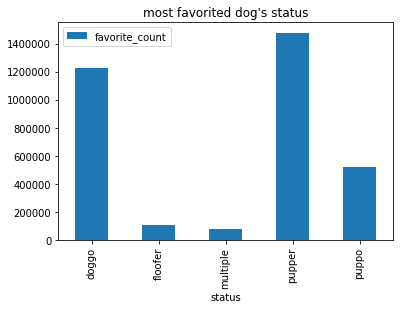

In [73]:
# 对问题1可视化
df5 = twitter_archive_master.groupby('status',as_index = False)['favorite_count'].sum()
df5.set_index('status').plot(kind = 'bar');
plt.title("most favorited dog's status")